# <center>Time Series Analysis on Pune precipitation data from 1965 to 2002.</center>

In [47]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import itertools
import warnings
warnings.filterwarnings('ignore')

In [48]:
filename = 'pune_1965_to_2002.csv'
STORAGE_FOLDER = 'output/'

In [49]:
rainfall_data_matrix = pd.read_csv(filename, delimiter='\t')
rainfall_data_matrix.set_index('Year', inplace=True)
rainfall_data_matrix = rainfall_data_matrix.transpose()
rainfall_data_matrix

Year,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
Jan,0.029,0.905,0.248,0.318,0.248,0.070,0.000,0.000,0.000,0.000,...,0.000,0.879,0.695,0.016,1.284,0.008,0.000,0.000,0.147,0.231
Feb,0.069,0.000,3.390,3.035,2.524,0.000,0.000,0.029,2.969,0.000,...,0.078,0.325,0.000,2.779,0.000,2.671,1.431,0.170,0.000,0.911
Mar,0.000,0.000,1.320,1.704,0.334,0.001,0.000,0.000,0.234,6.427,...,1.211,2.415,1.770,0.087,0.747,0.073,0.000,0.000,2.178,0.388
Apr,21.667,2.981,13.482,23.307,4.569,16.218,0.812,5.982,3.925,16.864,...,2.062,16.823,25.949,6.318,23.912,0.377,0.642,1.193,1.528,53.266
May,17.859,63.008,11.116,7.441,6.213,68.036,57.691,19.101,14.978,51.209,...,3.248,33.378,23.964,5.134,4.664,15.717,35.828,26.237,7.860,18.430
Jun,102.111,94.088,251.314,179.872,393.682,300.546,297.187,132.413,304.484,148.697,...,234.068,749.030,163.515,453.607,673.831,238.609,415.471,371.328,247.982,509.145
Jul,606.071,481.942,780.006,379.354,678.354,330.502,122.195,338.484,696.024,405.359,...,450.088,707.986,501.461,558.586,422.913,590.663,277.137,265.417,279.547,84.936
Aug,402.521,59.386,181.069,171.979,397.335,283.476,372.693,68.741,256.932,319.651,...,150.278,230.898,114.206,212.489,541.579,362.357,98.616,220.814,189.404,257.205
Sep,69.511,150.624,183.757,219.884,205.413,158.640,286.056,120.415,183.206,288.533,...,101.928,115.509,288.262,203.642,60.477,243.444,225.962,147.196,158.025,78.269
Oct,5.249,1.308,50.404,73.997,24.014,115.758,39.424,1.078,101.805,188.876,...,225.904,116.348,84.359,176.471,31.050,96.324,180.300,38.246,135.518,21.486


In [50]:
dates = pd.date_range(start='1965-01', freq='MS', periods=len(rainfall_data_matrix.columns)*12)
dates

DatetimeIndex(['1965-01-01', '1965-02-01', '1965-03-01', '1965-04-01',
               '1965-05-01', '1965-06-01', '1965-07-01', '1965-08-01',
               '1965-09-01', '1965-10-01',
               ...
               '2002-03-01', '2002-04-01', '2002-05-01', '2002-06-01',
               '2002-07-01', '2002-08-01', '2002-09-01', '2002-10-01',
               '2002-11-01', '2002-12-01'],
              dtype='datetime64[ns]', length=456, freq='MS')

Text(0.5,1,'Month vs Precipitation across all years')

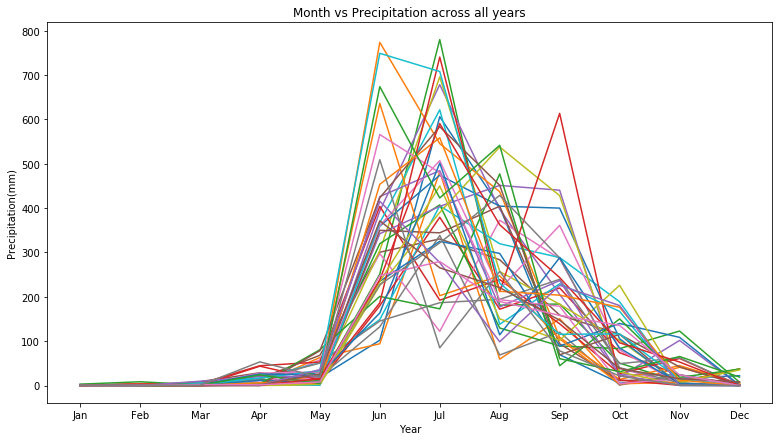

In [51]:
plt.figure(figsize=(13,7))
plt.plot(rainfall_data_matrix)
plt.xlabel('Year')
plt.ylabel('Precipitation(mm)')
plt.title('Month vs Precipitation across all years')

Text(0.5,1,'Month vs Precipitation across all years')

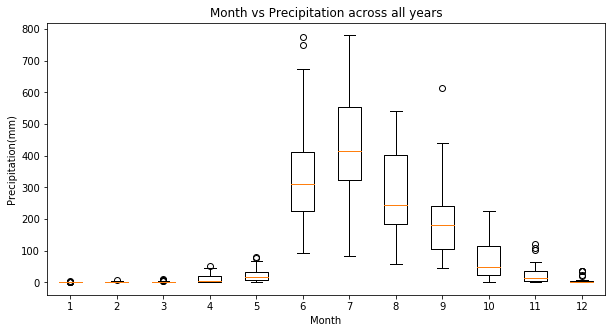

In [52]:
plt.figure(figsize=(10,5))
plt.boxplot(rainfall_data_matrix)
plt.xlabel('Month')
plt.ylabel('Precipitation(mm)')
plt.title('Month vs Precipitation across all years')

In [53]:
rainfall_data_matrix_np = rainfall_data_matrix.transpose().as_matrix()

shape = rainfall_data_matrix_np.shape
rainfall_data_matrix_np = rainfall_data_matrix_np.reshape((shape[0] * shape[1], 1))

In [54]:
rainfall_data = pd.DataFrame({'Precipitation': rainfall_data_matrix_np[:,0]})
rainfall_data.set_index(dates, inplace=True)

test_rainfall_data = rainfall_data.ix['1995': '2002']
rainfall_data = rainfall_data.ix[: '1994']
rainfall_data = rainfall_data.round(5)
rainfall_data.head()

,Precipitation
1965-01-01,0.029
1965-02-01,0.069
1965-03-01,0.000
1965-04-01,21.667
1965-05-01,17.859


In [55]:
rainfall_data.shape

(360, 1)

In [56]:
test_rainfall_data.shape

(96, 1)

In [57]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(rainfall_data)

MinMaxScaler(copy=True, feature_range=(0, 1))

## <center> Artificial Neural Networks </center>

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

In [59]:
def calculate_performance(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    return round(mse, 3), round(mae, 3), round(mape, 3), round(rmse, 3)

In [60]:
def plot_keras_model(model, show_shapes=True, show_layer_names=True):
    return SVG(model_to_dot(model, show_shapes=show_shapes, show_layer_names=show_layer_names).create(prog='dot',format='svg'))

In [61]:
def get_combinations(parameters):
    return list(itertools.product(*parameters))

In [62]:
def create_NN(input_nodes, hidden_nodes, output_nodes):
    model = Sequential()
    model.add(Dense(int(hidden_nodes), input_dim=int(input_nodes)))
    model.add(Dense(int(output_nodes)))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [63]:
def train_model(model, X_train, y_train, epochs, batch_size):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, shuffle=True)
    return model

In [64]:
def reshape_arrays(X_train, y_train):
    X_train = np.array(X_train)
    y_train = np.reshape(y_train, (len(y_train), 1))
    return X_train, y_train

In [65]:
def preprocess_FNN(data, look_back):
    data = np.array(data)[:, 0]
    X_train = []
    y_train = []
    for i in range(data.shape[0]-look_back):
        x = data[i:look_back+i][::-1]
        y = data[look_back+i]
        X_train.append(list(x))
        y_train.append(y)
    input_seq_for_test = data[i+1:look_back+i+1][::-1]
    return X_train, y_train, input_seq_for_test

In [66]:
def forecast_FNN(model, input_sequence, future_steps):
    forecasted_values = []
    for i in range(future_steps):
        forecasted_value = model.predict(input_sequence)
        forecasted_values.append(forecasted_value[0][0])
        input_sequence[0] = np.append(forecasted_value, input_sequence[0][:-1])
    return forecasted_values

In [67]:
def FNN(data, look_back, hidden_nodes, output_nodes, epochs, batch_size, future_steps, scaler):
    data = scaler.transform(data)
    X_train, y_train, input_seq_for_test_FNN = preprocess_FNN(data, look_back)
    X_train, y_train = reshape_arrays(X_train, y_train)

    model_FNN = create_NN(input_nodes=look_back, hidden_nodes=hidden_nodes, output_nodes=output_nodes)
    model_FNN = train_model(model_FNN, X_train, y_train, epochs, batch_size)

    input_seq_for_test_FNN = np.reshape(input_seq_for_test_FNN, (1, len(input_seq_for_test_FNN)))
    forecasted_values_FNN = forecast_FNN(model_FNN, input_sequence=input_seq_for_test_FNN, future_steps=future_steps)
    
    forecasted_values_FNN = list(scaler.inverse_transform([forecasted_values_FNN])[0])
    
    return model_FNN, forecasted_values_FNN

In [68]:
def get_accuracies_FNN(rainfall_data, test_rainfall_data, parameters, scaler):
    combination_of_params = get_combinations(parameters)
    information_FNN = []
    iterator = 0
    print('FNN - Number of combinations: ' + str(len(combination_of_params)))
    
    for param in combination_of_params:
        if (iterator+1) != len(combination_of_params):
            print(iterator+1, end=' -> ')
        else:
            print(iterator+1)
        iterator = iterator+1

        look_back = param[0]
        hidden_nodes = param[1]
        output_nodes = param[2]
        epochs = param[3]
        batch_size = param[4]
        future_steps = param[5]

        model_FNN, forecasted_values_FNN = FNN(rainfall_data, look_back, hidden_nodes, output_nodes, epochs, batch_size, future_steps, scaler)
        
        y_true = test_rainfall_data.ix[:future_steps].Precipitation
        mse, mae, mape, rmse = calculate_performance(y_true, forecasted_values_FNN)
        
        info = list(param) + [mse, mae, rmse] + forecasted_values_FNN
        information_FNN.append(info)

    information_FNN_df = pd.DataFrame(information_FNN)
    indexes = [str(i) for i in list(range(1, future_steps+1))]
    information_FNN_df.columns = ['look_back', 'hidden_nodes', 'output_nodes', 'epochs', 'batch_size', 'future_steps', 'MSE', 'MAE', 'RMSE'] + indexes
    return information_FNN_df

In [69]:
def preprocess_TLNN(data, time_lagged_points):
    data = np.array(data)[:, 0]
    X_train = []
    y_train = []
    for i in range(max(time_lagged_points), data.shape[0]):
        x = [data[i-p] for p in time_lagged_points]
        y = data[i]
        X_train.append(list(x))
        y_train.append(y)
    input_seq_for_test = [data[i+1-p] for p in time_lagged_points]
    return X_train, y_train, input_seq_for_test

In [70]:
def forecast_TLNN(model, time_lagged_points, last_sequence, future_steps):
    forecasted_values = []
    max_lag = max(time_lagged_points)
    for i in range(future_steps):
        input_sequence = [last_sequence[max_lag - p] for p in time_lagged_points]
        forecasted_value = model.predict(np.reshape(input_sequence, (1, len(input_sequence))))
        forecasted_values.append(forecasted_value[0][0])
        last_sequence = last_sequence[1:] + [forecasted_value[0][0]]
    return forecasted_values

In [71]:
def TLNN(data, time_lagged_points, hidden_nodes, output_nodes, epochs, batch_size, future_steps, scaler):
    data = scaler.transform(data)
    X_train, y_train, input_seq_for_test_TLNN = preprocess_TLNN(data, time_lagged_points)
    X_train, y_train = reshape_arrays(X_train, y_train)
    model_TLNN = create_NN(input_nodes=len(time_lagged_points), hidden_nodes=hidden_nodes, output_nodes=output_nodes)
    model_TLNN = train_model(model_TLNN, X_train, y_train, epochs, batch_size)

    max_lag = max(time_lagged_points)
    forecasted_values_TLNN = forecast_TLNN(model_TLNN, time_lagged_points, 
                                      list(data[-max_lag:]), future_steps=future_steps)
    forecasted_values_TLNN = list(scaler.inverse_transform([forecasted_values_TLNN])[0])
    
    return model_TLNN, forecasted_values_TLNN

In [72]:
def get_accuracies_TLNN(rainfall_data, test_rainfall_data, parameters, scaler):
    combination_of_params = get_combinations(parameters)
    information_TLNN = []
    iterator = 0
    print('TLNN - Number of combinations: ' + str(len(combination_of_params)))
    
    for param in combination_of_params:
        if (iterator+1) != len(combination_of_params):
            print(iterator+1, end=' -> ')
        else:
            print(iterator+1)
        iterator = iterator+1

        time_lagged_points = param[0]
        hidden_nodes = param[1]
        output_nodes = param[2]
        epochs = param[3]
        batch_size = param[4]
        future_steps = param[5]

        model_TLNN, forecasted_values_TLNN = TLNN(rainfall_data, time_lagged_points, hidden_nodes, output_nodes, epochs, batch_size, future_steps, scaler)
        
        y_true = test_rainfall_data.ix[:future_steps].Precipitation
        mse, mae, mape, rmse = calculate_performance(y_true, forecasted_values_TLNN)
        
        info = list(param) + [mse, mae, rmse] + forecasted_values_TLNN
        information_TLNN.append(info)

    information_TLNN_df = pd.DataFrame(information_TLNN)
    indexes = [str(i) for i in list(range(1, future_steps+1))]
    information_TLNN_df.columns = ['look_back_lags', 'hidden_nodes', 'output_nodes', 'epochs', 'batch_size', 'future_steps', 'MSE', 'MAE', 'RMSE'] + indexes
    return information_TLNN_df

In [73]:
def preprocess_SANN(data, seasonal_period):
    data = np.array(data)[:, 0]
    X_train = []
    y_train = []
    for i in range(seasonal_period, data.shape[0]-seasonal_period+1):
        x = data[i-seasonal_period:i][::-1]
        y = data[i:i+seasonal_period]
        X_train.append(list(x))
        y_train.append(list(y))
    input_seq_for_test = data[i+1-seasonal_period:i+1][::-1]
    return X_train, y_train, input_seq_for_test

In [74]:
def forecast_SANN(model, input_sequence, seasonal_period, future_steps):
    iterations = future_steps/seasonal_period
    forecasted_values = []
    for i in range(int(iterations) + 1):
        next_forecasted_values = model.predict(input_sequence)
        forecasted_values += list(next_forecasted_values[0])
        input_sequence = next_forecasted_values
    return forecasted_values[:future_steps]

In [75]:
def SANN(data, seasonal_period, hidden_nodes, epochs, batch_size, future_steps, scaler):
    data = scaler.transform(data)
    X_train, y_train, input_seq_for_test_SANN = preprocess_SANN(data, seasonal_period)
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    input_seq_for_test_SANN = np.reshape(input_seq_for_test_SANN, (1, len(input_seq_for_test_SANN)))
    model_SANN = create_NN(input_nodes=seasonal_period, hidden_nodes=hidden_nodes, output_nodes=seasonal_period)
    model_SANN = train_model(model_SANN, X_train, y_train, epochs, batch_size)
    
    forecasted_values_SANN = forecast_SANN(model_SANN, input_seq_for_test_SANN, seasonal_period, future_steps=future_steps)
    forecasted_values_SANN = list(scaler.inverse_transform([forecasted_values_SANN])[0])
    return model_SANN, forecasted_values_SANN

In [76]:
def get_accuracies_SANN(rainfall_data, test_rainfall_data, parameters, scaler):
    combination_of_params = get_combinations(parameters)
    information_SANN = []
    iterator = 0
    print('SANN - Number of combinations: ' + str(len(combination_of_params)))
    
    for param in combination_of_params:
        if (iterator+1) != len(combination_of_params):
            print(iterator+1, end=' -> ')
        else:
            print(iterator+1)
        iterator = iterator+1

        seasonal_period = param[0]
        hidden_nodes = param[1]
        epochs = param[2]
        batch_size = param[3]
        future_steps = param[4]

        model_SANN, forecasted_values_SANN = SANN(rainfall_data, seasonal_period, hidden_nodes, epochs, batch_size, future_steps, scaler)
        
        y_true = test_rainfall_data.ix[:future_steps].Precipitation
        mse, mae, mape, rmse = calculate_performance(y_true, forecasted_values_SANN)
        
        info = list(param) + [mse, mae, rmse] + forecasted_values_SANN
        information_SANN.append(info)

    information_SANN_df = pd.DataFrame(information_SANN)
    indexes = [str(i) for i in list(range(1, future_steps+1))]
    information_SANN_df.columns = ['seasonal_period', 'hidden_nodes', 'epochs', 'batch_size', 'future_steps', 'MSE', 'MAE', 'RMSE'] + indexes
    return information_SANN_df

In [77]:
def create_LSTM(input_nodes, hidden_nodes, output_nodes):
    model = Sequential()
    model.add(LSTM(hidden_nodes, input_shape=(1, input_nodes)))
    model.add(Dense(output_nodes))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [78]:
def preprocess_LSTM(data, look_back):
    data = np.array(data)[:, 0]
    X_train = []
    y_train = []
    for i in range(data.shape[0]-look_back):
        x = data[i:look_back+i][::-1]
        y = data[look_back+i]
        X_train.append(list(x))
        y_train.append(y)
    input_seq_for_test = data[i+1:look_back+i+1][::-1]
    return X_train, y_train, input_seq_for_test

In [79]:
def forecast_LSTM(model, input_sequence, future_steps):
    forecasted_values = []
    for i in range(future_steps):
        forecasted_value = model.predict(input_sequence)
        forecasted_values.append(forecasted_value[0][0])
        input_sequence[0][0] = np.append(forecasted_value, input_sequence[0][0][:-1])
    return forecasted_values

In [80]:
def Long_Short_Term_Memory(data, look_back, hidden_nodes, output_nodes, epochs, batch_size, future_steps, scaler):
    data = scaler.transform(data)
    X_train, y_train, input_seq_for_test_LSTM = preprocess_LSTM(data, look_back)
    X_train = np.reshape(X_train, (len(X_train), 1, look_back))

    model_LSTM = create_LSTM(input_nodes=look_back, hidden_nodes=hidden_nodes, output_nodes=output_nodes)
    plot_keras_model(model_LSTM)
    model_LSTM = train_model(model_LSTM, X_train, y_train, epochs, batch_size)

    input_seq_for_test_LSTM = np.reshape(input_seq_for_test_LSTM, (1, 1, len(input_seq_for_test_LSTM)))
    forecasted_values_LSTM = forecast_LSTM(model_LSTM, input_sequence=input_seq_for_test_LSTM, future_steps=future_steps)
    
    forecasted_values_LSTM = list(scaler.inverse_transform([forecasted_values_LSTM])[0])
    
    return model_LSTM, forecasted_values_LSTM

In [81]:
def get_accuracies_LSTM(rainfall_data, test_rainfall_data, parameters, scaler):
    combination_of_params = get_combinations(parameters)
    information_LSTM = []
    iterator = 0
    print('LSTM - Number of combinations: ' + str(len(combination_of_params)))
    
    for param in combination_of_params:
        if (iterator+1) != len(combination_of_params):
            print(iterator+1, end=' -> ')
        else:
            print(iterator+1)
        iterator = iterator+1

        input_nodes = param[0]
        hidden_nodes = param[1]
        output_nodes = param[2]
        epochs = param[3]
        batch_size = param[4]
        future_steps = param[5]

        model_LSTM, forecasted_values_LSTM = Long_Short_Term_Memory(rainfall_data, input_nodes, hidden_nodes, output_nodes, epochs, batch_size, future_steps, scaler)
        
        y_true = test_rainfall_data.ix[:future_steps].Precipitation
        mse, mae, mape, rmse = calculate_performance(y_true, forecasted_values_LSTM)
        
        info = list(param) + [mse, mae, rmse] + forecasted_values_LSTM
        information_LSTM.append(info)

    information_LSTM_df = pd.DataFrame(information_LSTM)
    indexes = [str(i) for i in list(range(1, future_steps+1))]
    information_LSTM_df.columns = ['look_back', 'hidden_nodes', 'output_nodes', 'epochs', 'batch_size', 'future_steps', 'MSE', 'MAE', 'RMSE'] + indexes
    return information_LSTM_df

In [82]:
def analyze_results(data_frame, test_rainfall_data, name, flag=False):
    optimized_params = data_frame.iloc[data_frame.RMSE.argmin]
    future_steps = optimized_params.future_steps
    forecast_values = optimized_params[-1*int(future_steps):]
    y_true = test_rainfall_data.ix[:int(future_steps)]
    forecast_values.index = y_true.index
    
    print('=== Best parameters of ' + name + ' ===\n')
    if (name == 'FNN' or name == 'LSTM'):
        model = create_NN(optimized_params.look_back, 
                          optimized_params.hidden_nodes, 
                          optimized_params.output_nodes)
        print('Input nodes(p): ' + str(optimized_params.look_back))
        print('Hidden nodes: ' + str(optimized_params.hidden_nodes))
        print('Output nodes: ' + str(optimized_params.output_nodes))
    elif (name == 'TLNN'):
        model = create_NN(len(optimized_params.look_back_lags), 
                          optimized_params.hidden_nodes, 
                          optimized_params.output_nodes)
        s = ''
        for i in optimized_params.look_back_lags:
            s = s+' '+str(i)
        print('Look back lags: ' + s)
        print('Hidden nodes: ' + str(optimized_params.hidden_nodes))
        print('Output nodes: ' + str(optimized_params.output_nodes))
    elif (name == 'SANN'):
        model = create_NN(optimized_params.seasonal_period, 
                          optimized_params.hidden_nodes, 
                          optimized_params.seasonal_period)
        print('Input nodes(s): ' + str(optimized_params.seasonal_period))
        print('Hidden nodes: ' + str(optimized_params.hidden_nodes))
        print('Output nodes: ' + str(optimized_params.seasonal_period))
        
    print('Number of epochs: ' + str(optimized_params.epochs))
    print('Batch size: ' + str(optimized_params.batch_size))
    print('Number of future steps forecasted: ' + str(optimized_params.future_steps))
    print('Mean Squared Error(MSE): ' + str(optimized_params.MSE))
    print('Mean Absolute Error(MAE): ' + str(optimized_params.MAE))
    print('Root Mean Squared Error(RMSE): ' + str(optimized_params.RMSE))
    print('\n\n')
    
    # Save model
    from keras.utils import plot_model
    plot_model(model, to_file = STORAGE_FOLDER + name + '_best_fit_model.png', show_shapes=True, show_layer_names=True)
    
    # Save data
    data_frame.to_csv(STORAGE_FOLDER + name + '_information.csv')
    optimized_params.to_csv(STORAGE_FOLDER + name + '_optimized_values.csv')
    
    plt.figure(figsize=(10,5))
    plt.plot(y_true, color='green', label='Actual values')
    plt.plot(forecast_values, color='red', label='Forecasted values')
    plt.xlabel('Year')
    plt.ylabel('Monthly mean Precipitation')
    plt.legend(loc='best')
    if (flag==False):
        plt.title(name + ' - Comaprison: Actual vs Forecasted')
        plt.savefig(STORAGE_FOLDER + name + '_best_forecast'  + '.png')
    else:
        plt.title('Best of all: ' + name + ' - Comaprison: Actual vs Forecasted')
        plt.savefig(STORAGE_FOLDER + 'BEST_FORECAST_' + name + '.png')
    
    return optimized_params

In [83]:
def best_of_all(list_of_methods):
    RMSE_values = [x.RMSE for x in list_of_methods]
    index = np.argmin(RMSE_values)
    if (index==0):
        name = 'FNN'
    elif (index == 1):
        name = 'TLNN'
    elif (index == 2):
        name = 'SANN'
    else:
        name = 'LSTM'
    print('Overall Best method on this data is ' + name)
    return index, name

In [84]:
def compare_ANN_methods(rainfall_data, test_rainfall_data, scaler, parameters_FNN, parameters_TLNN, parameters_SANN, parameters_LSTM, future_steps):
    
    information_FNN_df = get_accuracies_FNN(rainfall_data, test_rainfall_data, parameters_FNN, scaler)
    optimized_params_FNN = analyze_results(information_FNN_df, test_rainfall_data, 'FNN')
    
    information_TLNN_df = get_accuracies_TLNN(rainfall_data, test_rainfall_data, parameters_TLNN, scaler)
    optimized_params_TLNN = analyze_results(information_TLNN_df, test_rainfall_data, 'TLNN')
    
    information_SANN_df = get_accuracies_SANN(rainfall_data, test_rainfall_data, parameters_SANN, scaler)
    optimized_params_SANN = analyze_results(information_SANN_df, test_rainfall_data, 'SANN')
    
    information_LSTM_df = get_accuracies_LSTM(rainfall_data, test_rainfall_data, parameters_LSTM, scaler)
    optimized_params_LSTM = analyze_results(information_LSTM_df, test_rainfall_data, 'LSTM')
    
    list_of_methods = [optimized_params_FNN, optimized_params_TLNN, optimized_params_SANN, optimized_params_LSTM]
    information = [information_FNN_df, information_TLNN_df, information_SANN_df, information_LSTM_df]
    index, name = best_of_all(list_of_methods)
    best_optimized_params = analyze_results(information[index], test_rainfall_data, name, True)

In [85]:
future_steps = 60

FNN - Number of combinations: 28
1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> 11 -> 12 -> 13 -> 14 -> 15 -> 16 -> 17 -> 18 -> 19 -> 20 -> 21 -> 22 -> 23 -> 24 -> 25 -> 26 -> 27 -> 28
=== Best parameters of FNN ===

Input nodes(p): 12.0
Hidden nodes: 3.0
Output nodes: 1.0
Number of epochs: 500.0
Batch size: 20.0
Number of future steps forecasted: 60.0
Mean Squared Error(MSE): 13918.443
Mean Absolute Error(MAE): 82.958
Root Mean Squared Error(RMSE): 117.976



TLNN - Number of combinations: 16
1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> 11 -> 12 -> 13 -> 14 -> 15 -> 16
=== Best parameters of TLNN ===

Look back lags:  1 2 3 4 5 6 10 11 12
Hidden nodes: 5
Output nodes: 1
Number of epochs: 300
Batch size: 20
Number of future steps forecasted: 60
Mean Squared Error(MSE): 15743.769
Mean Absolute Error(MAE): 89.677
Root Mean Squared Error(RMSE): 125.474



SANN - Number of combinations: 8
1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8
=== Best parameters of SANN ===

Input nodes(s): 12.0
H

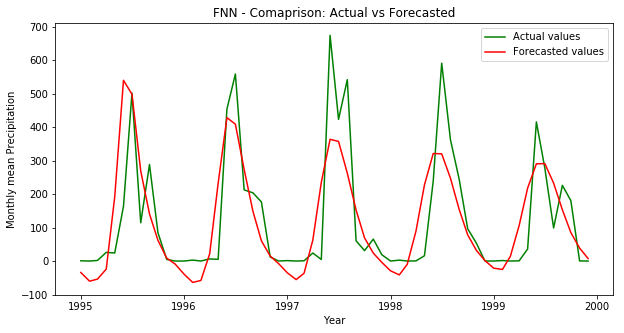

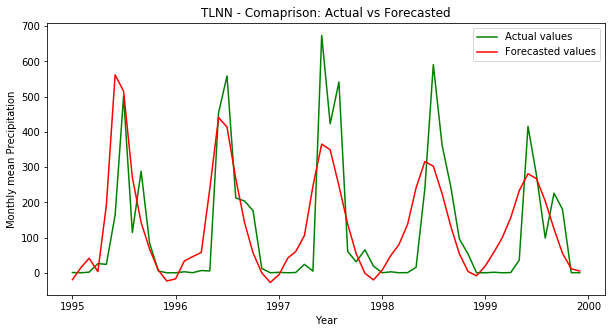

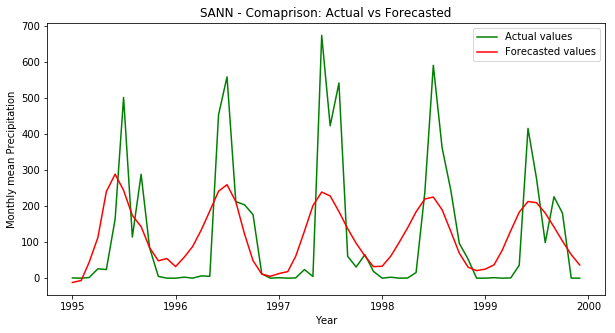

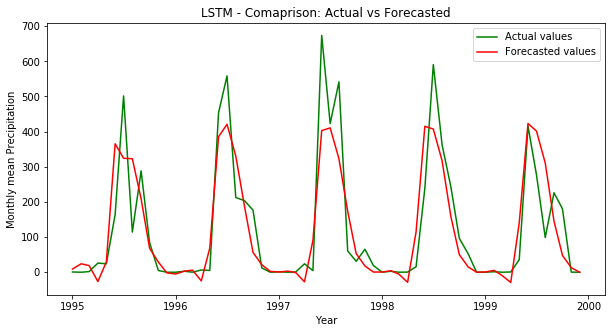

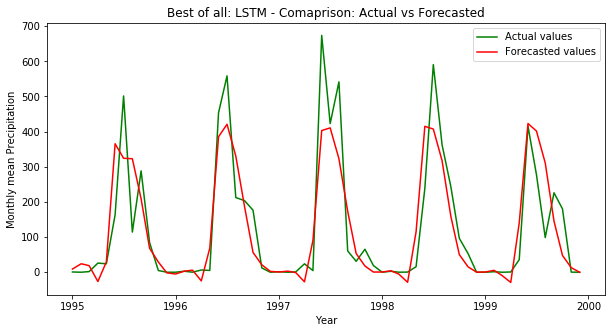

In [86]:
# look_back, hidden_nodes, output_nodes, epochs, batch_size, future_steps
parameters_FNN = [[1,2,3,6,8,10,12], [3,4,5,6], [1], [500], [20], [future_steps]]

# time_lagged_points, hidden_nodes, output_nodes, epochs, batch_size, future_steps
parameters_TLNN = [[[1,2,3,11,12], [1,2,3,4,11,12], [1,2,3,11,12,13], [1,2,3,4,5,6,10,11,12]], [3,4,5,6], [1], [300], [20], [future_steps]]

# seasonal_period, hidden_nodes, epochs, batch_size, future_steps
parameters_SANN = [[12], [3,4,5,6,7,8,9,10], [500], [20], [future_steps]]

# look_back, hidden_nodes, output_nodes, epochs, batch_size, future_steps
parameters_LSTM = [[1,2,3,4,5,6,7,8,9,10,11,12,13], [3,4,5,6], [1], [300], [20], [future_steps]]

compare_ANN_methods(rainfall_data, test_rainfall_data, scaler, 
                    parameters_FNN, parameters_TLNN, parameters_SANN, parameters_LSTM, future_steps)

In [88]:
STORAGE_FOLDER

'output/'

In [89]:
fnn = pd.read_csv(STORAGE_FOLDER + 'FNN_optimized_values.csv')
tlnn = pd.read_csv(STORAGE_FOLDER + 'TLNN_optimized_values.csv')
sann = pd.read_csv(STORAGE_FOLDER + 'SANN_optimized_values.csv')
lstm = pd.read_csv(STORAGE_FOLDER + 'LSTM_optimized_values.csv')

In [126]:
names = ['FNN', 'TLNN', 'SANN', 'LSTM']
RMSE_values = [117.976000, 125.474000, 139.222000, 92.758000]
RMSE_info = pd.Series(RMSE_values, index=names)

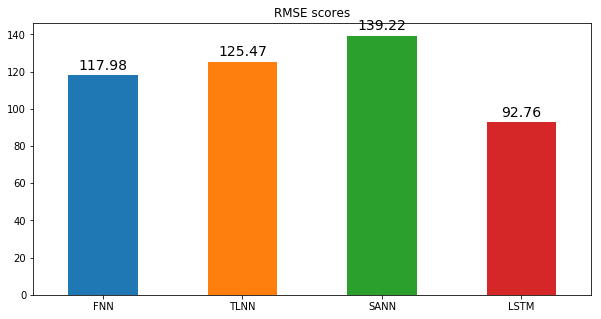

In [129]:
ax = RMSE_info.plot(kind='bar', figsize=(10,5), rot=0, title='RMSE scores')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', fontsize=14, color='black')